# Kaggle - Titanic

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
ntrain = 891

In [6]:
data_df = pd.concat([train_df, test_df]).reset_index()
data_df.drop('index', axis=1, inplace=True)

In [7]:
data_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [8]:
data_df.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Data Clenaing

In [9]:
data_df.isna().sum()/len(data_df) * 100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64

In [10]:
data_df.drop(['Cabin', 'Name', 'PassengerId'], axis=1, inplace=True)

In [11]:
data_df.loc[data_df.Fare.isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1043,NaN,3,male,60.5,0,0,3701,NaN,S


In [12]:
avg_fare = data_df.groupby('Pclass').mean()['Fare']

In [13]:
avg_fare

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

In [14]:
data_df.at[1043, 'Fare'] = 13.3029

In [15]:
data_df.loc[data_df.Embarked.isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,1.0,1,female,38.0,0,0,113572,80.0,NaN
829,1.0,1,female,62.0,0,0,113572,80.0,NaN


In [16]:
data_df.Embarked.mode()

0    S
dtype: object

In [17]:
data_df['Embarked'].fillna('S', inplace=True)

In [18]:
avg_age = data_df.groupby('Sex').mean()['Age']
avg_age.round()

Sex
female    29.0
male      31.0
Name: Age, dtype: float64

In [19]:
data_df['Age'].fillna(30.0, inplace=True)

In [20]:
data_df.isna().sum()/len(data_df) * 100

Survived    31.932773
Pclass       0.000000
Sex          0.000000
Age          0.000000
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Embarked     0.000000
dtype: float64

## Data Featuring and Visualization

In [21]:
data_featured = data_df.copy()

### Sex

In [22]:
data_df.groupby('Sex').sum()['Survived']

Sex
female    233.0
male      109.0
Name: Survived, dtype: float64

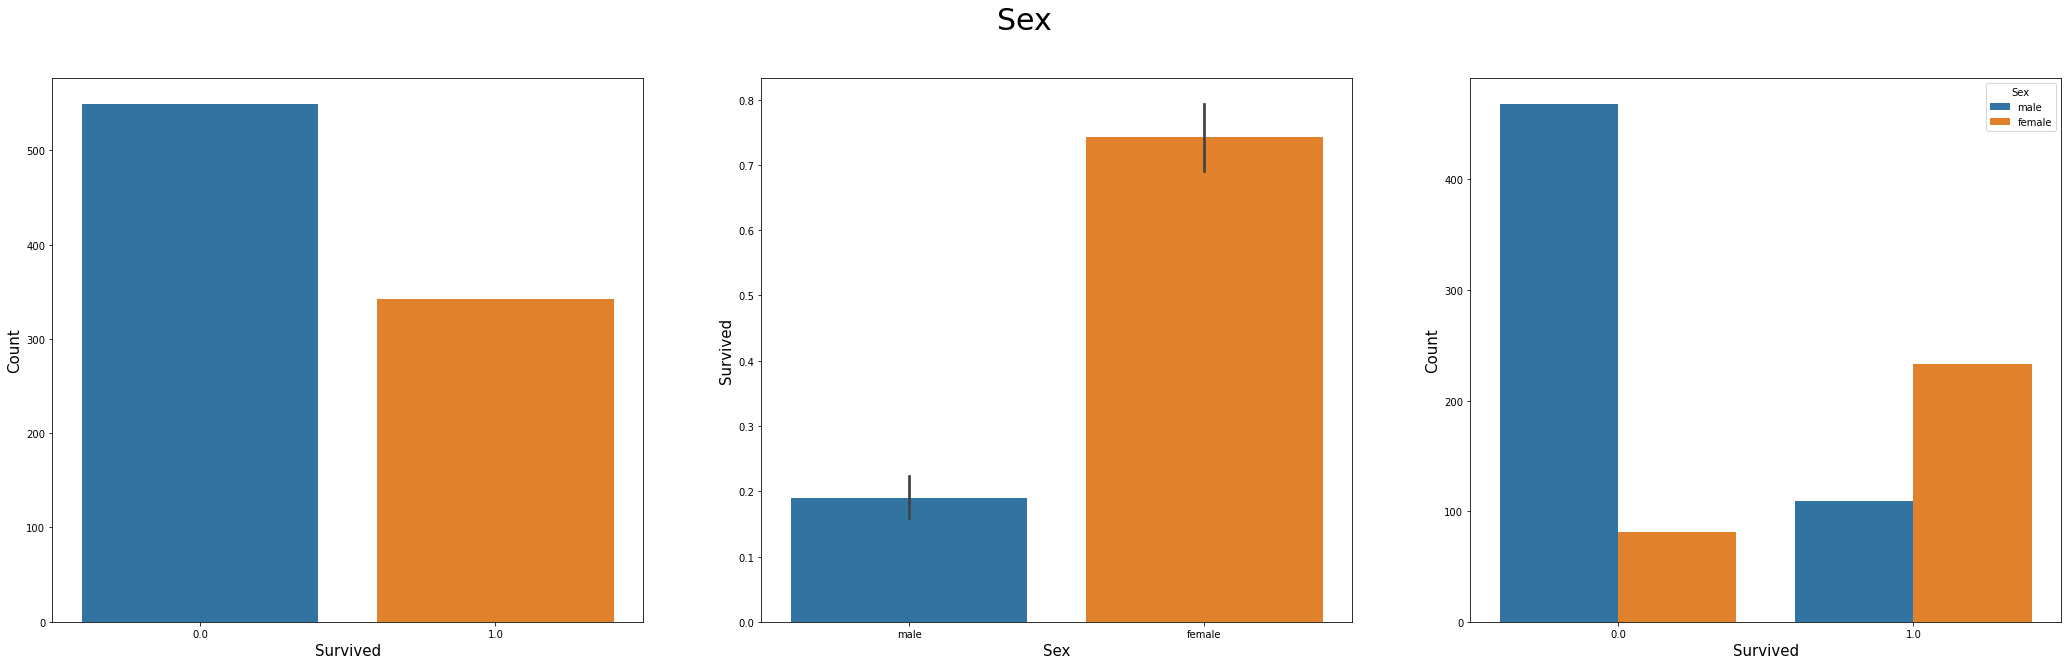

In [23]:
fig, axes = plt.subplots(1,3, figsize=(36,10));
fig.suptitle('Sex', fontsize=30)
sns.countplot(data_df.Survived, ax=axes[0])
axes[0].set_xlabel('Survived', fontsize=15)
axes[0].set_ylabel('Count', fontsize=15)
sns.barplot(x='Sex', y='Survived', data=data_df, ax=axes[1])
axes[1].set_xlabel('Sex', fontsize=15)
axes[1].set_ylabel('Survived', fontsize=15)
sns.countplot(data_df.Survived,  hue=data_df.Sex, ax=axes[2])
axes[2].set_xlabel('Survived', fontsize=15)
axes[2].set_ylabel('Count', fontsize=15);

In [24]:
data_featured['Male'] = data_featured['Sex'].replace({'male':1, 'female':0})
data_featured['Female'] = data_featured['Sex'].replace({'male':0, 'female':1})

In [25]:
data_featured.drop('Sex', axis=1, inplace=True)

### Pclass

In [26]:
data_df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

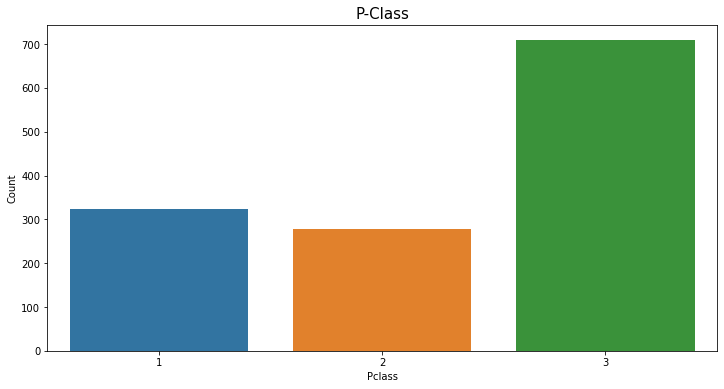

In [27]:
plt.figure(figsize=(12,6))

sns.countplot(data_df['Pclass']);

plt.title('P-Class', fontsize=15)
plt.ylabel('Count');

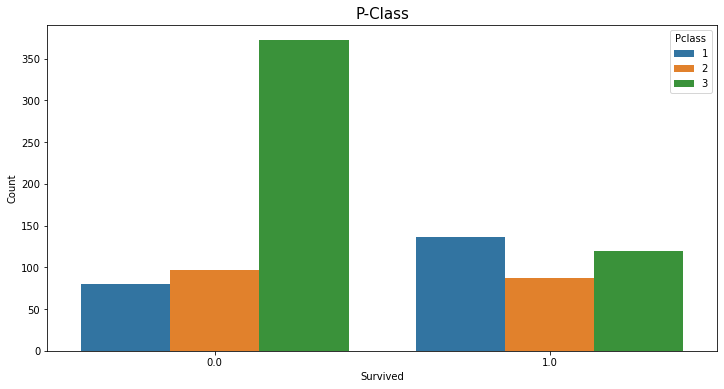

In [28]:
plt.figure(figsize=(12,6))

sns.countplot(data_df['Survived'], hue=data_df['Pclass']);

plt.title('P-Class', fontsize=15)
plt.ylabel('Count');

In [29]:
Pclass = pd.get_dummies(data_featured[['Pclass']])
data_featured = pd.concat([data_featured, Pclass], axis=1)
data_featured.drop(columns = 'Pclass', inplace = True)

In [30]:
data_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

### Age

In [31]:
data_df.groupby('Age').sum()['Survived']

Age
0.17     0.0
0.33     0.0
0.42     1.0
0.67     1.0
0.75     2.0
        ... 
70.50    0.0
71.00    0.0
74.00    0.0
76.00    0.0
80.00    1.0
Name: Survived, Length: 98, dtype: float64

In [32]:
data_featured['Age'] = data_featured.Age.round()

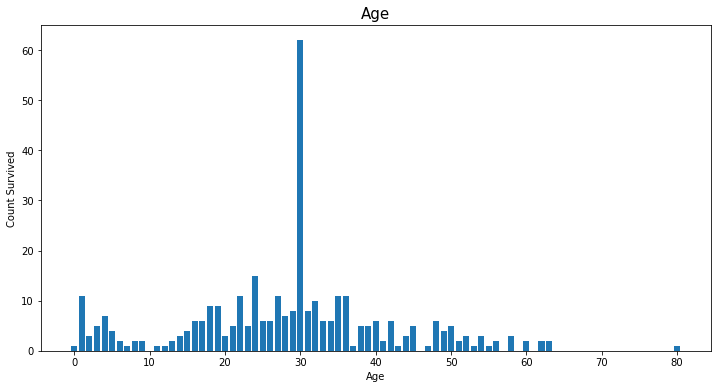

In [33]:
plt.figure(figsize=(12,6))

plt.bar(data_featured.groupby('Age').sum()['Survived'].index, data_featured.groupby('Age').sum()['Survived']);

plt.xlabel('Age')
plt.ylabel('Count Survived')
plt.title('Age', fontsize=15);

### SibSp & Parch

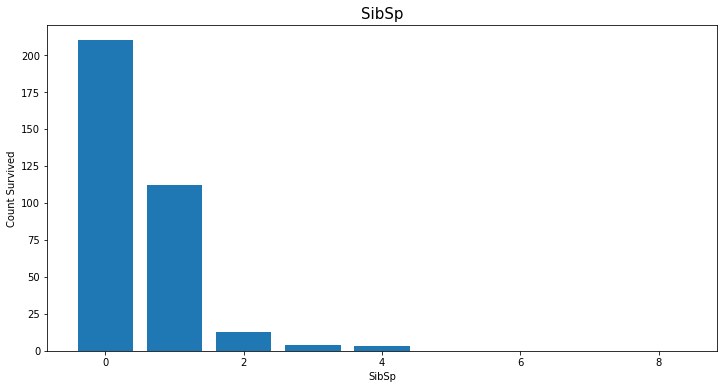

In [34]:
plt.figure(figsize=(12,6))

plt.bar(data_featured.groupby('SibSp').sum()['Survived'].index, data_featured.groupby('SibSp').sum()['Survived']);

plt.xlabel('SibSp')
plt.ylabel('Count Survived')
plt.title('SibSp', fontsize=15);

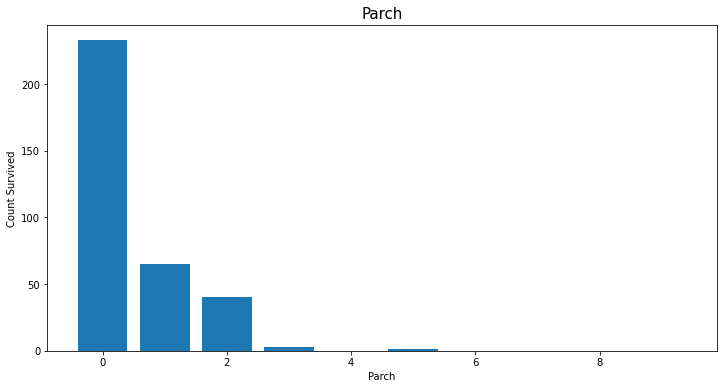

In [35]:
plt.figure(figsize=(12,6))

plt.bar(data_featured.groupby('Parch').sum()['Survived'].index, data_featured.groupby('Parch').sum()['Survived']);

plt.xlabel('Parch')
plt.ylabel('Count Survived')
plt.title('Parch', fontsize=15);

In [36]:
def Alone(x):
    if  (x['SibSp'] + x['Parch'])  > 0:
        return 0
    else:
        return 1
data_featured['Alone'] = data_featured.apply(Alone, axis=1)

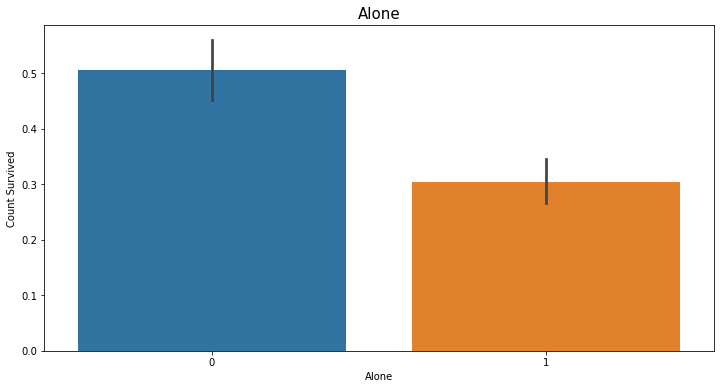

In [37]:
plt.figure(figsize=(12,6))

sns.barplot(x='Alone', y='Survived', data=data_featured);

plt.xlabel('Alone')
plt.ylabel('Count Survived')
plt.title('Alone', fontsize=15);

In [38]:
data_featured.drop(['SibSp', 'Parch'], axis=1, inplace=True)

### Ticket & Fare

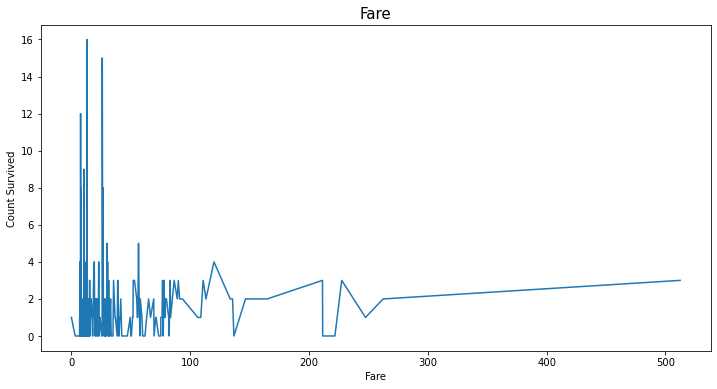

In [39]:
plt.figure(figsize=(12,6))

plt.plot(data_featured.groupby('Fare').sum()['Survived'].index, data_featured.groupby('Fare').sum()['Survived']);

plt.xlabel('Fare')
plt.ylabel('Count Survived')
plt.title('Fare', fontsize=15);

In [40]:
data_df.Ticket.nunique()

929

In [41]:
data_featured.drop('Ticket', axis=1, inplace=True)

### Embarked

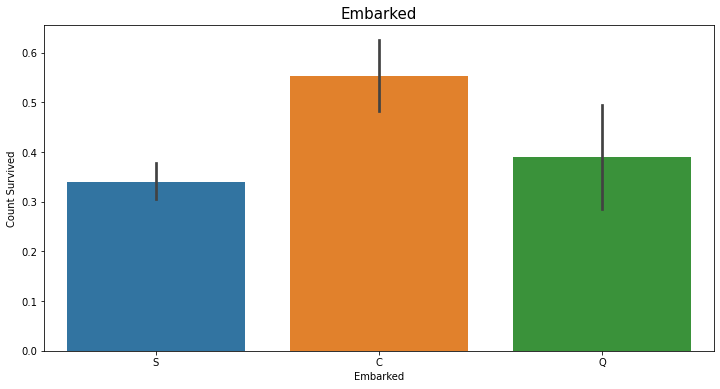

In [42]:
plt.figure(figsize=(12,6))

sns.barplot(x='Embarked', y='Survived', data=data_featured);

plt.xlabel('Embarked')
plt.ylabel('Count Survived')
plt.title('Embarked', fontsize=15);

In [43]:
data_df.Embarked.value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [44]:
Embarked = pd.get_dummies(data_featured[['Embarked']])
data_featured = pd.concat([data_featured, Embarked], axis=1)
data_featured.drop(columns = 'Embarked', inplace = True)

In [45]:
data_featured

,Survived,Age,Fare,Male,Female,Alone,Embarked_C,Embarked_Q,Embarked_S
0,0.0,22.0,7.2500,1,0,0,0,0,1
1,1.0,38.0,71.2833,0,1,0,1,0,0
2,1.0,26.0,7.9250,0,1,1,0,0,1
3,1.0,35.0,53.1000,0,1,0,0,0,1
4,0.0,35.0,8.0500,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
1304,NaN,30.0,8.0500,1,0,1,0,0,1
1305,NaN,39.0,108.9000,0,1,1,1,0,0
1306,NaN,38.0,7.2500,1,0,1,0,0,1
1307,NaN,30.0,8.0500,1,0,1,0,0,1


## Data Preproccessing

In [46]:
def get_features_and_labels(train_frame, test_frame):
    '''
    Transforms and scales the input data and returns numpy arrays for
    training and testing inputs and targets.
    '''
    # Convert values to floats
    arr = np.array(train_frame, dtype=np.float)
    test_arr = np.array(test_frame, dtype=np.float)
    
    # Using the first column as the target variable
    X, y = arr[:, 1:], arr[:, 0]
    X_test = test_arr[:, 1:]
    
    # Use 85% of the data for training,  but cross validate over the entire dataset.
    from sklearn.model_selection import train_test_split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15)
    #X_val = X
    #y_val = y
    
    # If values are missing we could impute them from the training data
    #from sklearn.preprocessing import Imputer
    #imputer = Imputer(strategy='mean')
    #imputer.fit(X_train)
    #X_train = imputer.transform(X_train)
    #X_test = imputer.transform(X_test)
    
    # Normalize the attribute values to mean=0 and variance=1
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    
    # Fit the scaler based on the training data, then apply the same
    # scaling to both training and test sets.
    scaler.fit(X)
    X_train = scaler.transform(X_train)
    X_val = scaler.transform(X_val)
    
    scaler.fit(X_test)
    X_test = scaler.transform(X_test)

    # Return the training and test sets
    return X_train, X_val, y_train, y_val, X_test

In [47]:
train_frame = data_featured.loc[:ntrain-1]
test_frame = data_featured.loc[ntrain:]

In [48]:
X_train, X_val, y_train, y_val, X_test = get_features_and_labels(train_frame, test_frame)

## Modeling

In [49]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import precision_recall_curve, f1_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from catboost import CatBoostClassifier

In [50]:
models={}
sns.set_style('darkgrid')

### Logistic RegressionCV

C for the best model: [0.0066]
LogisticRegressionCV: Score=0.821


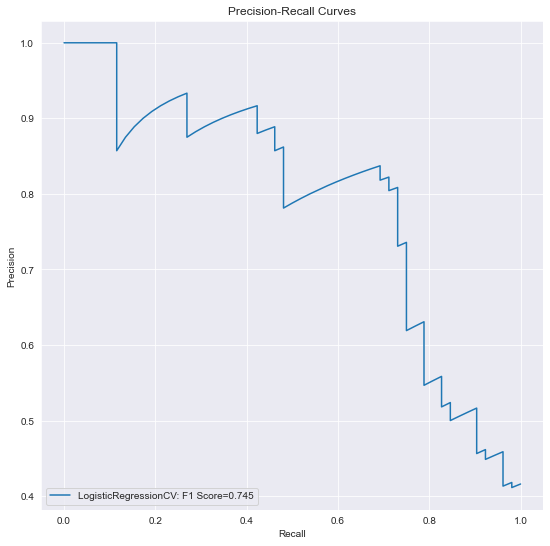

In [51]:
name = 'logistic'
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
grid = {'Cs':np.arange(0.0001,0.01,0.0001)}
models[name] = LogisticRegressionCV(cv=cv, **grid)
models[name].fit(X_train, y_train)
print(f"C for the best model: {models[name].C_}")

score = models[name].score(X_val, y_val)
print('LogisticRegressionCV: Score={:.3f}'.format(score))
f1 = f1_score(y_val, models[name].predict(X_val))
y_prob = models[name].decision_function(X_val)
precision, recall, _ = precision_recall_curve(y_val, y_prob)

plt.figure(figsize=(9,9))
plt.plot(recall, precision, label = 'LogisticRegressionCV: F1 Score={:.3f}'.format(f1))
plt.title('Precision-Recall Curves')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend(loc='lower left')

### K-NearestNeighbours

K-NearestNeighbours: Score=0.799


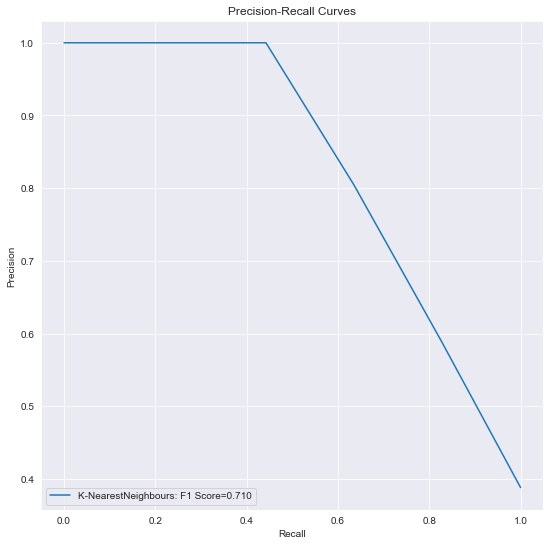

In [52]:
name = 'knn'
#cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
#grid = {'Cs':np.arange(0.0001,0.01,0.0001)}
models[name] = KNeighborsClassifier(3)
models[name].fit(X_train, y_train)
#print(f"C for the best model: {models[name].C_}")

score = models[name].score(X_val, y_val)
print('K-NearestNeighbours: Score={:.3f}'.format(score))
f1 = f1_score(y_val, models[name].predict(X_val))
if hasattr(models[name], "decision_function"):
    y_prob = models[name].decision_function(X_val)
else:
    y_prob = models[name].predict_proba(X_val)[:, 1]
precision, recall, _ = precision_recall_curve(y_val, y_prob)

plt.figure(figsize=(9,9))
plt.plot(recall, precision, label = 'K-NearestNeighbours: F1 Score={:.3f}'.format(f1))
plt.title('Precision-Recall Curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')

### Linear SVM

C for the best model: 0.1
LinearSVM: Score=0.821


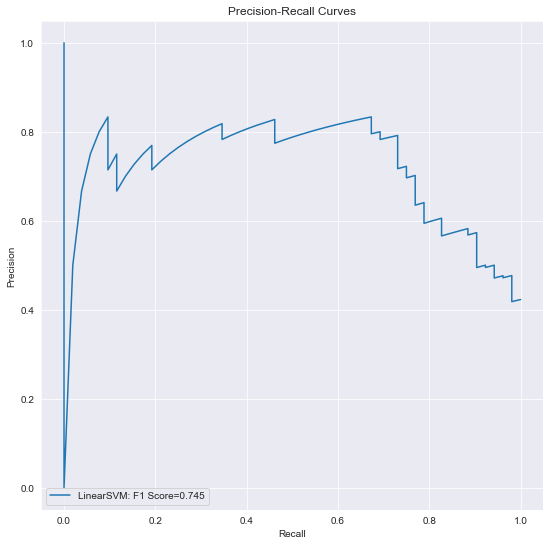

In [53]:
name = 'linearsvm'
#cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
Cs = np.arange(0.1,10,0.01)
scores= []
for C in Cs:
    models[name] = SVC(kernel="linear", C=C)
    models[name].fit(X_train, y_train)
    score = models[name].score(X_val, y_val)
    scores.append((C,score))

scores.sort(key=lambda x: x[1], reverse=True)
best_C = scores[0][0]
print(f"C for the best model: {best_C}")
models[name] = SVC(kernel="linear", C=best_C)
models[name].fit(X_train, y_train)

score = models[name].score(X_val, y_val)
print('LinearSVM: Score={:.3f}'.format(score))
f1 = f1_score(y_val, models[name].predict(X_val))
if hasattr(models[name], "decision_function"):
    y_prob = models[name].decision_function(X_val)
else:
    y_prob = models[name].predict_proba(X_val)[:, 1]
precision, recall, _ = precision_recall_curve(y_val, y_prob)

plt.figure(figsize=(9,9))
plt.plot(recall, precision, label = 'LinearSVM: F1 Score={:.3f}'.format(f1))
plt.title('Precision-Recall Curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')

### RBF SVM

Parameters for the best model (C, gamma): (3.8000000000000025, 0.5)
RbfSVM: Score=0.836


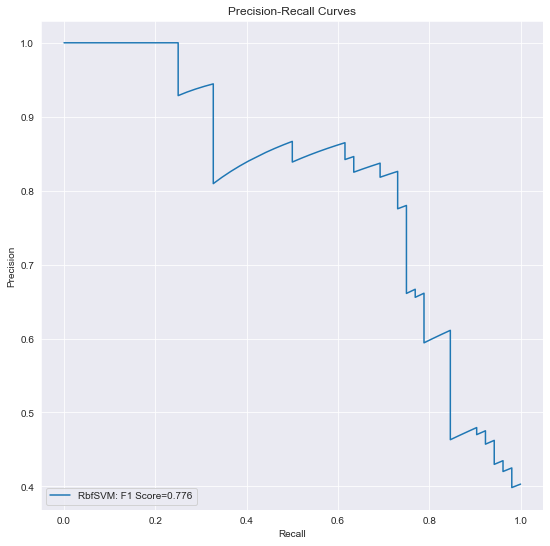

In [54]:
name = 'rbfsvm'
#cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
Cs = np.arange(1,10,0.1)
gammas = [0.01, 0.1, 0.5, 1, 1.5, 2]
scores= []
for C in Cs:
    for gamma in gammas:
        models[name] = SVC(kernel="rbf", C=C, gamma=gamma)
        models[name].fit(X_train, y_train)
        score = models[name].score(X_val, y_val)
        scores.append((C, gamma,score))

scores.sort(key=lambda x: x[2], reverse=True)
best_C = scores[0][0]
best_gamma = scores[0][1]
print(f"Parameters for the best model (C, gamma): {(best_C, best_gamma)}")
models[name] = SVC(kernel="rbf", C=best_C, gamma=best_gamma)
models[name].fit(X_train, y_train)

score = models[name].score(X_val, y_val)
print('RbfSVM: Score={:.3f}'.format(score))
f1 = f1_score(y_val, models[name].predict(X_val))
if hasattr(models[name], "decision_function"):
    y_prob = models[name].decision_function(X_val)
else:
    y_prob = models[name].predict_proba(X_val)[:, 1]
precision, recall, _ = precision_recall_curve(y_val, y_prob)

plt.figure(figsize=(9,9))
plt.plot(recall, precision, label = 'RbfSVM: F1 Score={:.3f}'.format(f1))
plt.title('Precision-Recall Curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')

### Sigmoid SVM

Parameters for the best model (C, gamma): (0.55, 0.05)
SigmoidSVM: Score=0.828


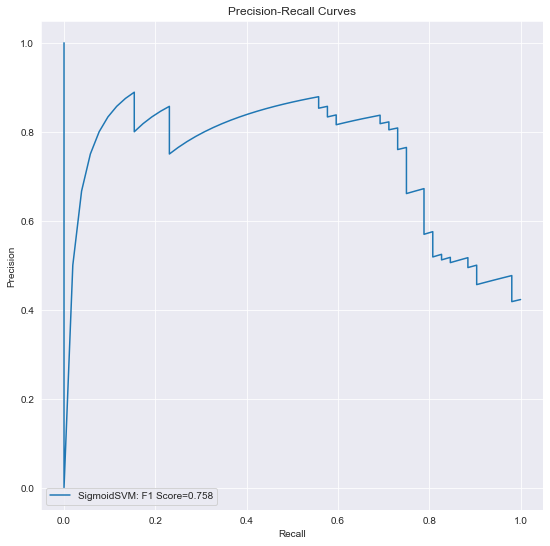

In [55]:
name = 'sigmoidsvm'
#cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
Cs = np.arange(0.5,1,0.05)
gammas = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
scores= []
for C in Cs:
    for gamma in gammas:
        models[name] = SVC(kernel="sigmoid", C=C, gamma=gamma)
        models[name].fit(X_train, y_train)
        score = models[name].score(X_val, y_val)
        scores.append((C, gamma,score))

scores.sort(key=lambda x: x[2], reverse=True)
best_C = scores[0][0]
best_gamma = scores[0][1]
print(f"Parameters for the best model (C, gamma): {(best_C, best_gamma)}")
models[name] = SVC(kernel="sigmoid", C=best_C, gamma=best_gamma)
models[name].fit(X_train, y_train)

score = models[name].score(X_val, y_val)
print('SigmoidSVM: Score={:.3f}'.format(score))
f1 = f1_score(y_val, models[name].predict(X_val))
if hasattr(models[name], "decision_function"):
    y_prob = models[name].decision_function(X_val)
else:
    y_prob = models[name].predict_proba(X_val)[:, 1]
precision, recall, _ = precision_recall_curve(y_val, y_prob)

plt.figure(figsize=(9,9))
plt.plot(recall, precision, label = 'SigmoidSVM: F1 Score={:.3f}'.format(f1))
plt.title('Precision-Recall Curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')

### GaussianProcess

Parameters for the best model: 0.05
GaussianProcess: Score=0.813


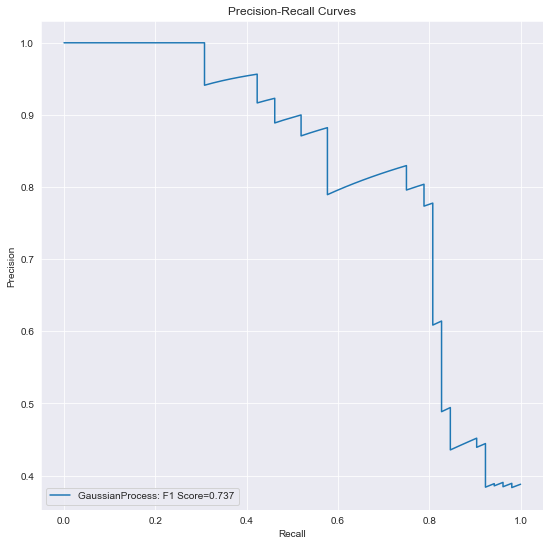

In [56]:
name = 'gpc'
#cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
Cs = np.arange(0.05,1,0.05)
scores= []
for C in Cs:
    models[name] = GaussianProcessClassifier(1.0 * RBF(C))
    models[name].fit(X_train, y_train)
    score = models[name].score(X_val, y_val)
    scores.append((C,score))

scores.sort(key=lambda x: x[1], reverse=True)
best_C = scores[0][0]
print(f"Parameters for the best model: {(best_C)}")
models[name] = GaussianProcessClassifier(1.0 * RBF(best_C))
models[name].fit(X_train, y_train)

score = models[name].score(X_val, y_val)
print('GaussianProcess: Score={:.3f}'.format(score))
f1 = f1_score(y_val, models[name].predict(X_val))
if hasattr(models[name], "decision_function"):
    y_prob = models[name].decision_function(X_val)
else:
    y_prob = models[name].predict_proba(X_val)[:, 1]
precision, recall, _ = precision_recall_curve(y_val, y_prob)

plt.figure(figsize=(9,9))
plt.plot(recall, precision, label = 'GaussianProcess: F1 Score={:.3f}'.format(f1))
plt.title('Precision-Recall Curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')

### DecisionTree

Parameters for the best model (msl, mss, max_depth): (1, 2, 2)
DecisionTree: Score=0.821


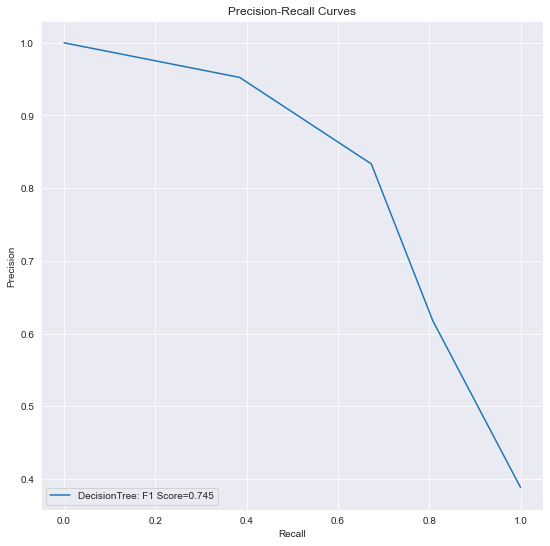

In [57]:
name = 'dtc'
#cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
#Cs = np.arange(0.5,10,0.5)
msls = [1, 5, 10, 15, 20, 30]
msss = [2, 5, 10, 15, 20, 30]
max_depths = [2, 3, 4, 5, 10, None]
scores= []
for msl in msls:
    for mss in msss:
        for md in max_depths:
            models[name] = DecisionTreeClassifier(min_samples_leaf=msl, min_samples_split=mss, max_depth=md)
            models[name].fit(X_train, y_train)
            score = models[name].score(X_val, y_val)
            scores.append((msl, mss, md, score))

scores.sort(key=lambda x: x[3], reverse=True)
best_msl = scores[0][0]
best_mss = scores[0][1]
best_md = scores[0][2]
print(f"Parameters for the best model (msl, mss, max_depth): {(best_msl, best_mss, best_md)}")
models[name] = DecisionTreeClassifier(min_samples_leaf=best_msl, min_samples_split=best_mss, max_depth=best_md)
models[name].fit(X_train, y_train)

score = models[name].score(X_val, y_val)
print('DecisionTree: Score={:.3f}'.format(score))
f1 = f1_score(y_val, models[name].predict(X_val))
if hasattr(models[name], "decision_function"):
    y_prob = models[name].decision_function(X_val)
else:
    y_prob = models[name].predict_proba(X_val)[:, 1]
precision, recall, _ = precision_recall_curve(y_val, y_prob)

plt.figure(figsize=(9,9))
plt.plot(recall, precision, label = 'DecisionTree: F1 Score={:.3f}'.format(f1))
plt.title('Precision-Recall Curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')

### RandomForest

Parameters for the best model (msl, mss, max_depth): (1, 10, None)
RandomForest: Score=0.828


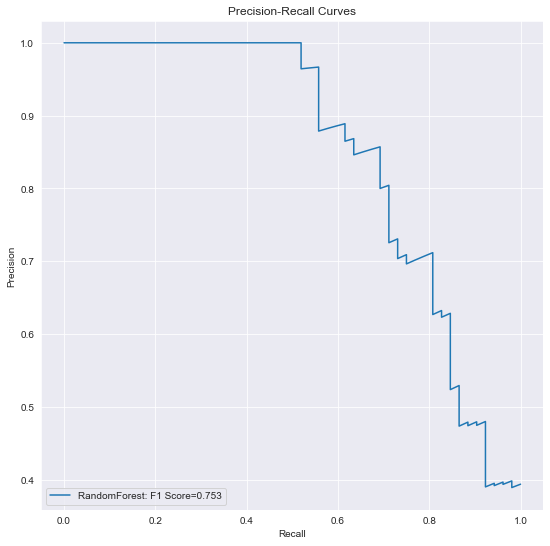

In [58]:
name = 'rfc'
#cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
#Cs = np.arange(0.5,10,0.5)
msls = [1, 5, 10, 15, 20, 30]
msss = [2, 5, 10, 15, 20, 30]
max_depths = [2, 3, 4, 5, 10, None]
scores= []
for msl in msls:
    for mss in msss:
        for md in max_depths:
            models[name] = RandomForestClassifier(min_samples_leaf=msl, 
                                                  min_samples_split=mss, 
                                                  max_depth=md, n_estimators=500)
            models[name].fit(X_train, y_train)
            score = models[name].score(X_val, y_val)
            scores.append((msl, mss, md, score))

scores.sort(key=lambda x: x[3], reverse=True)
best_msl = scores[0][0]
best_mss = scores[0][1]
best_md = scores[0][2]
print(f"Parameters for the best model (msl, mss, max_depth): {(best_msl, best_mss, best_md)}")
models[name] = RandomForestClassifier(min_samples_leaf=best_msl, 
                                      min_samples_split=best_mss, 
                                      max_depth=best_md, n_estimators=500)
models[name].fit(X_train, y_train)

score = models[name].score(X_val, y_val)
print('RandomForest: Score={:.3f}'.format(score))
f1 = f1_score(y_val, models[name].predict(X_val))
if hasattr(models[name], "decision_function"):
    y_prob = models[name].decision_function(X_val)
else:
    y_prob = models[name].predict_proba(X_val)[:, 1]
precision, recall, _ = precision_recall_curve(y_val, y_prob)

plt.figure(figsize=(9,9))
plt.plot(recall, precision, label = 'RandomForest: F1 Score={:.3f}'.format(f1))
plt.title('Precision-Recall Curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')

### NeuralNetwork

Params for the best model: (5e-05, 'logistic', 0.1, 0.8, 0.999)
NeuralNetwork: Score=0.821


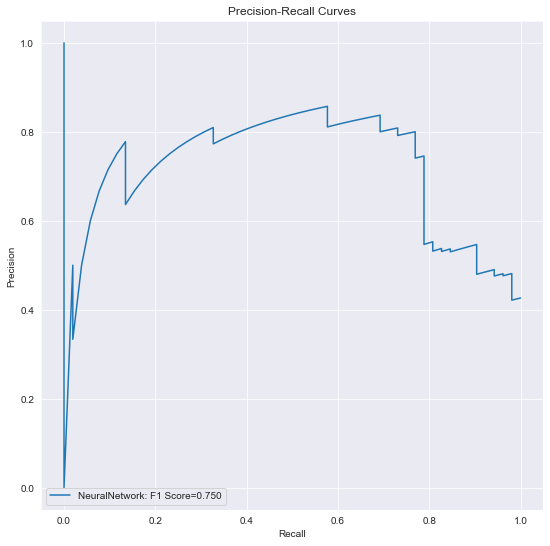

In [59]:
name = 'neuralnet'
#cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
alphas = [0.00005, 0.0001, 0.005, 0.01]
activations = ['logistic', 'tanh', 'relu']
learning_rate_inits = [0.001, 0.005, 0.01, 0.1]
beta_1s = [0.9, 0.85, 0.8]
beta_2s = [0.999, 0.995, 0.99]
scores= []
for alpha in alphas:
    for activation in activations:
        for lr_init in learning_rate_inits:
            for beta1 in beta_1s:
                for beta2 in beta_2s:
                    models[name] = MLPClassifier(hidden_layer_sizes=(18, 36, 18), max_iter = 10000, 
                                                 alpha=alpha, activation=activation, 
                                                 learning_rate_init=lr_init, beta_1=beta1, 
                                                beta_2=beta2, solver='adam', early_stopping=True)
                    models[name].fit(X_train, y_train)
                    score = models[name].score(X_val, y_val)
                    scores.append((alpha, activation, lr_init, beta1, beta2, score))

scores.sort(key=lambda x: x[5], reverse=True)
best_alpha = scores[0][0]
best_activation = scores[0][1]
best_lr_init = scores[0][2]
best_beta1 = scores[0][3]
best_beta2 = scores[0][4]
print(f"Params for the best model: {scores[0][0:5]}")
models[name] = MLPClassifier(hidden_layer_sizes=(18, 36, 18), max_iter = 10000, 
                             alpha=best_alpha, activation=best_activation, 
                             learning_rate_init=best_lr_init, beta_1=best_beta1, 
                             beta_2=best_beta2, solver='adam', early_stopping=True)
models[name].fit(X_train, y_train)

score = models[name].score(X_val, y_val)
print('NeuralNetwork: Score={:.3f}'.format(score))
f1 = f1_score(y_val, models[name].predict(X_val))
if hasattr(models[name], "decision_function"):
    y_prob = models[name].decision_function(X_val)
else:
    y_prob = models[name].predict_proba(X_val)[:, 1]
precision, recall, _ = precision_recall_curve(y_val, y_prob)

plt.figure(figsize=(9,9))
plt.plot(recall, precision, label = 'NeuralNetwork: F1 Score={:.3f}'.format(f1))
plt.title('Precision-Recall Curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left');

### AdaBoost

Parameters for the best model (lr, n_estimators): (0.05, 50)
AdaBoost: Score=0.836


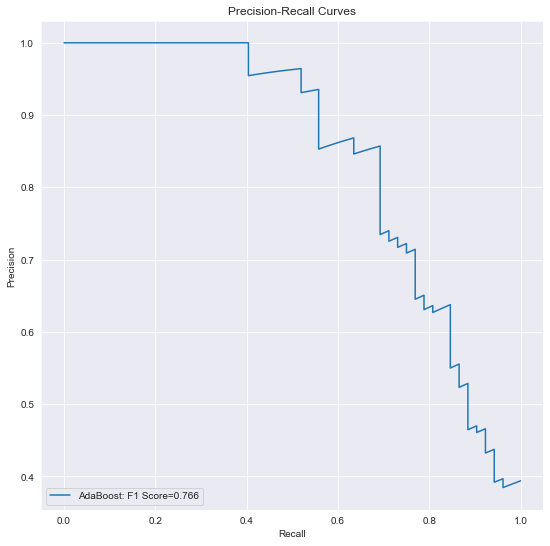

In [60]:
name = 'adaboost'
#cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
lrs = [0.05, 0.1, 0.5, 1, 2]
n_estimators = [50, 100, 200, 500]
scores= []
for lr in lrs:
    for n_estimator in n_estimators:
        models[name] = AdaBoostClassifier(base_estimator=models['rfc'], 
                                          learning_rate=lr, n_estimators=n_estimator)
        models[name].fit(X_train, y_train)
        score = models[name].score(X_val, y_val)
        scores.append((lr, n_estimator,score))

scores.sort(key=lambda x: x[2], reverse=True)
best_lr = scores[0][0]
best_n_estimator = scores[0][1]
print(f"Parameters for the best model (lr, n_estimators): {(best_lr, best_n_estimator)}")
models[name] = AdaBoostClassifier(base_estimator=models['rfc'], 
                                  learning_rate=best_lr, n_estimators=best_n_estimator)
models[name].fit(X_train, y_train)

score = models[name].score(X_val, y_val)
print('AdaBoost: Score={:.3f}'.format(score))
f1 = f1_score(y_val, models[name].predict(X_val))
if hasattr(models[name], "decision_function"):
    y_prob = models[name].decision_function(X_val)
else:
    y_prob = models[name].predict_proba(X_val)[:, 1]
precision, recall, _ = precision_recall_curve(y_val, y_prob)

plt.figure(figsize=(9,9))
plt.plot(recall, precision, label = 'AdaBoost: F1 Score={:.3f}'.format(f1))
plt.title('Precision-Recall Curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')

### Naive Bayes

GaussianNB: Score=0.821


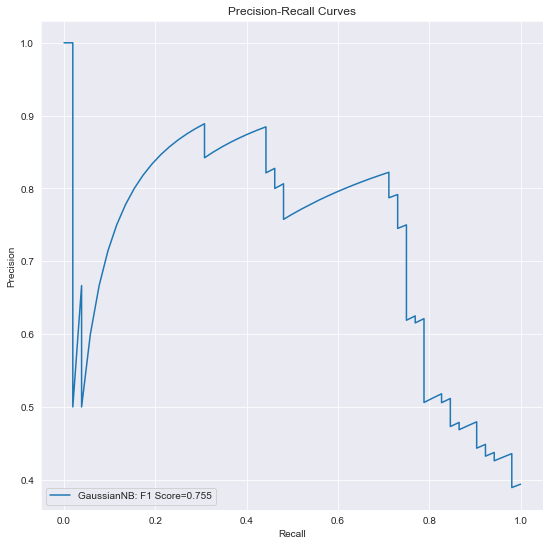

In [61]:
name = 'gaussiannb'
models[name] = GaussianNB()
models[name].fit(X_train, y_train)

score = models[name].score(X_val, y_val)
print('GaussianNB: Score={:.3f}'.format(score))
f1 = f1_score(y_val, models[name].predict(X_val))
if hasattr(models[name], "decision_function"):
    y_prob = models[name].decision_function(X_val)
else:
    y_prob = models[name].predict_proba(X_val)[:, 1]
precision, recall, _ = precision_recall_curve(y_val, y_prob)

plt.figure(figsize=(9,9))
plt.plot(recall, precision, label = 'GaussianNB: F1 Score={:.3f}'.format(f1))
plt.title('Precision-Recall Curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')

### QuadraticDiscriminantAnalysis

Parameters for the best model: 0.001
QuadraticDiscriminantAnalysis: Score=0.836


C:\Users\Sarda\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Sarda\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Sarda\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Sarda\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Sarda\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Sarda\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Sarda\anaconda3\lib\site-

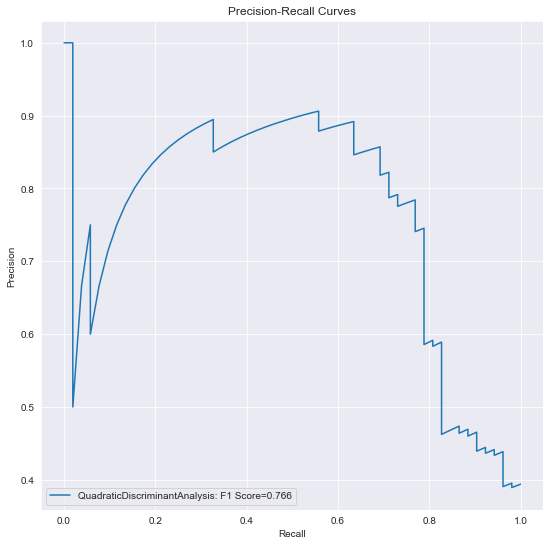

In [69]:
name = 'qda'
reg_params = [0.0, 0.001, 0.01, 0.1, 0.2, 0.5, 1]
scores=[]
for reg_param in reg_params:
    models[name] = QuadraticDiscriminantAnalysis(reg_param=reg_param)
    models[name].fit(X_train, y_train)
    score = models[name].score(X_val, y_val)
    scores.append((reg_param, score))
    
scores.sort(key = lambda x: x[1], reverse=True)
best_reg_param = scores[0][0]
print(f"Parameters for the best model: {best_reg_param}")
models[name] = QuadraticDiscriminantAnalysis(reg_param=best_reg_param)
models[name].fit(X_train, y_train)

score = models[name].score(X_val, y_val)
print('QuadraticDiscriminantAnalysis: Score={:.3f}'.format(score))
f1 = f1_score(y_val, models[name].predict(X_val))
if hasattr(models[name], "decision_function"):
    y_prob = models[name].decision_function(X_val)
else:
    y_prob = models[name].predict_proba(X_val)[:, 1]
precision, recall, _ = precision_recall_curve(y_val, y_prob)

plt.figure(figsize=(9,9))
plt.plot(recall, precision, label = 'QuadraticDiscriminantAnalysis: F1 Score={:.3f}'.format(f1))
plt.title('Precision-Recall Curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')

### LightGBM

Parameters for the best model: (0.1, 0.01, 0.1, 3, 10)
LightGBM: Score=0.858


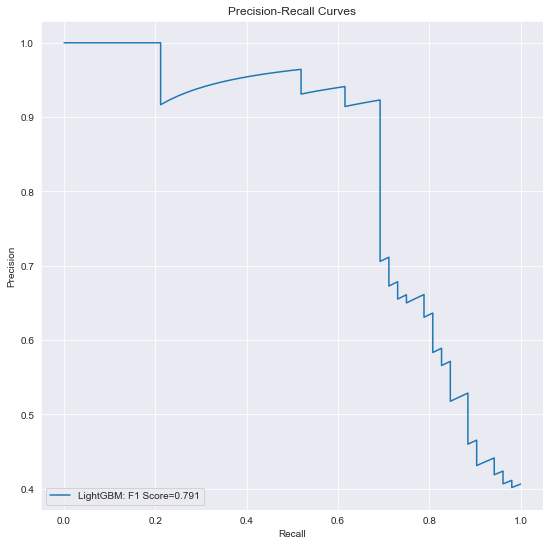

In [70]:
name = 'lightgbm'
#cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
lrs = [0.003, 0.03, 0.1, 0.2, 0.3, 0.4, 0.5, 1]
alphas = [0.01, 0.05, 0.1, 0.5, 1, 2]
lambdas = [0.01, 0.05, 0.1, 0.5, 1, 2]
max_depths = [3, 4, 5, 6, 10, 15]
mcss = [10, 20, 30, 40, 50]
scores= []
for lr in lrs:
    for alpha in alphas:
        for lambda_ in lambdas:
            for md in max_depths:
                for mcs in mcss:
                    models[name] = LGBMClassifier(reg_alpha=alpha, min_child_samples=mcs,
                                                 reg_lambda=lambda_, max_depth=md, 
                                                 n_estimators=500, learning_rate=lr)
                    models[name].fit(X_train, y_train)
                    score = models[name].score(X_val, y_val)
                    scores.append((lr, alpha, lambda_, md, mcs, score))

scores.sort(key=lambda x: x[5], reverse=True)
best_lr = scores[0][0]
best_alpha = scores[0][1]
best_lambda = scores[0][2]
best_md = scores[0][3]
best_mcs = scores[0][4]
print(f"Parameters for the best model: {(scores[0][:-1])}")
models[name] = LGBMClassifier(reg_alpha=best_alpha, min_child_samples=best_mcs,
                             reg_lambda=best_lambda, max_depth=best_md, 
                             n_estimators=500, learning_rate=best_lr)
models[name].fit(X_train, y_train)

score = models[name].score(X_val, y_val)
print('LightGBM: Score={:.3f}'.format(score))
f1 = f1_score(y_val, models[name].predict(X_val))
if hasattr(models[name], "decision_function"):
    y_prob = models[name].decision_function(X_val)
else:
    y_prob = models[name].predict_proba(X_val)[:, 1]
precision, recall, _ = precision_recall_curve(y_val, y_prob)

plt.figure(figsize=(9,9))
plt.plot(recall, precision, label = 'LightGBM: F1 Score={:.3f}'.format(f1))
plt.title('Precision-Recall Curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')

### XGBoost

C:\Users\Sarda\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Parameters for the best model: (0.1, 0.01, 0.1, 3)
XGBoost: Score=0.851


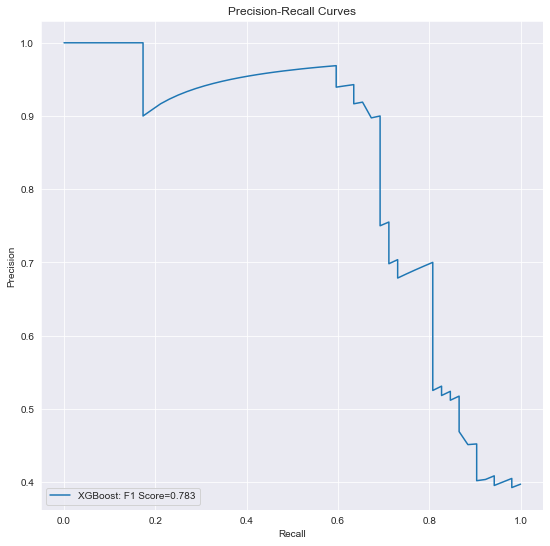

In [71]:
name = 'xgb'
#cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
#Cs = np.arange(0.5,10,0.5)
lrs = [0.003, 0.03, 0.1, 0.2, 0.3, 0.4, 0.5, 1]
alphas = [0.01, 0.05, 0.1, 0.5, 1, 2]
lambdas = [0.01, 0.05, 0.1, 0.5, 1, 2]
max_depths = [3, 4, 5, 6, 10, 15]
scores= []
for lr in lrs:
    for alpha in alphas:
        for lambda_ in lambdas:
            for md in max_depths:
                models[name] = XGBClassifier(reg_alpha=alpha, verbosity=0,
                                             reg_lambda=lambda_, max_depth=md, 
                                             num_parallel_tree=5, learning_rate=lr)
                models[name].fit(X_train, y_train)
                score = models[name].score(X_val, y_val)
                scores.append((lr, alpha, lambda_, md, score))

scores.sort(key=lambda x: x[4], reverse=True)
best_lr = scores[0][0]
best_alpha = scores[0][1]
best_lambda = scores[0][2]
best_md = scores[0][3]
print(f"Parameters for the best model: {(scores[0][:-1])}")
models[name] = XGBClassifier(reg_alpha=best_alpha, verbosity=0,
                             reg_lambda=best_lambda, max_depth=best_md, 
                             num_parallel_tree=5, learning_rate=best_lr)
models[name].fit(X_train, y_train)

score = models[name].score(X_val, y_val)
print('XGBoost: Score={:.3f}'.format(score))
f1 = f1_score(y_val, models[name].predict(X_val))
if hasattr(models[name], "decision_function"):
    y_prob = models[name].decision_function(X_val)
else:
    y_prob = models[name].predict_proba(X_val)[:, 1]
precision, recall, _ = precision_recall_curve(y_val, y_prob)

plt.figure(figsize=(9,9))
plt.plot(recall, precision, label = 'XGBoost: F1 Score={:.3f}'.format(f1))
plt.title('Precision-Recall Curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')

### CatBoost

Parameters for the best model: (0.001, 1, 1, 10)
CatBoost: Score=0.821


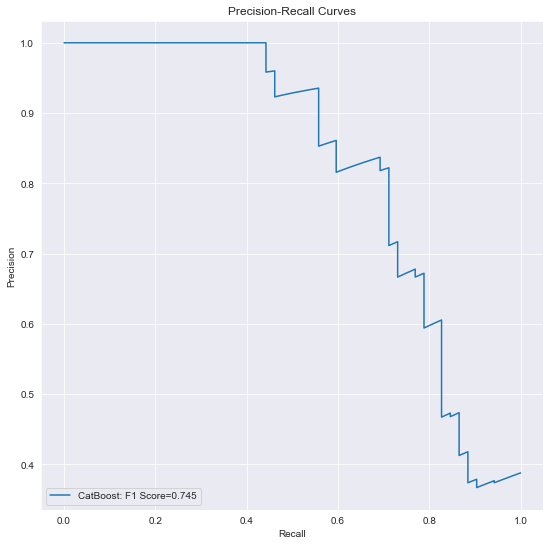

In [72]:
name = 'catboost'
#cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
#Cs = np.arange(0.5,10,0.5)
lrs = [0.001, 0.03]
reg_lambdas = [1, 2]
mcss = [1, 5]
max_depths = [10, 16]
scores= []
for lr in lrs:
    for reg_lambda in reg_lambdas: 
        for mcs in mcss:
            for md in max_depths:
                #print(lr, reg_lambda, mcs, md)
                models[name] = CatBoostClassifier(min_child_samples=mcs, learning_rate=lr,
                                                  reg_lambda=reg_lambda, max_depth=md, verbose=0)
                models[name].fit(X_train, y_train)
                score = models[name].score(X_val, y_val)
                scores.append((lr, reg_lambda, mcs, md, score))
scores.sort(key=lambda x: x[4], reverse=True)
best_lr = scores[0][0]
best_reg_lambda = scores[0][1]
best_mcs = scores[0][2]
best_md = scores[0][3]
print(f"Parameters for the best model: {(scores[0][:-1])}")
models[name] = CatBoostClassifier(min_child_samples=best_mcs, learning_rate=best_lr, 
                                  reg_lambda=best_reg_lambda, max_depth=best_md, verbose=0)
                                  
models[name].fit(X_train, y_train)

score = models[name].score(X_val, y_val)
print('CatBoost: Score={:.3f}'.format(score))
f1 = f1_score(y_val, models[name].predict(X_val))
if hasattr(models[name], "decision_function"):
    y_prob = models[name].decision_function(X_val)
else:
    y_prob = models[name].predict_proba(X_val)[:, 1]
precision, recall, _ = precision_recall_curve(y_val, y_prob)

plt.figure(figsize=(9,9))
plt.plot(recall, precision, label = 'CatBoost: F1 Score={:.3f}'.format(f1))
plt.title('Precision-Recall Curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')

### Stacking Classification

In [73]:
models.keys()

dict_keys(['logistic', 'knn', 'linearsvm', 'rbfsvm', 'sigmoidsvm', 'gpc', 'dtc', 'rfc', 'neuralnet', 'adaboost', 'gaussiannb', 'qda', 'lightgbm', 'xgb', 'catboost'])

#### SVM Mix

SVM_Mix: Score=0.813


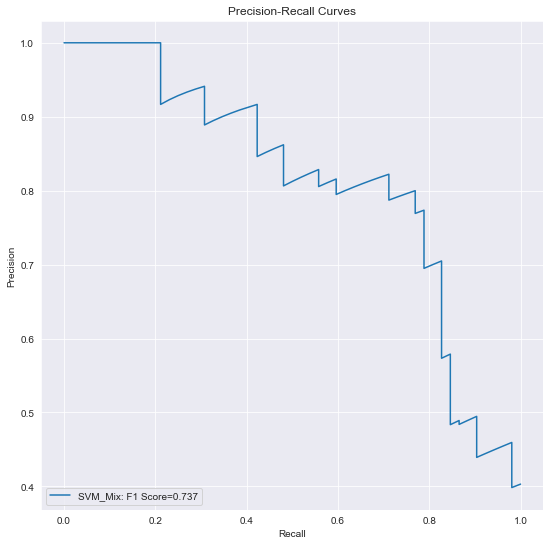

In [74]:
name='svm_mix'
estimators = [('linearsvm', models['linearsvm']),
              ('rbfsvm', models['rbfsvm']),
              ('sigmoidsvm', models['sigmoidsvm'])]
models[name] = StackingClassifier(estimators=estimators, final_estimator=models['gpc'])
models[name].fit(X_train, y_train)

score = models[name].score(X_val, y_val)
print('SVM_Mix: Score={:.3f}'.format(score))
f1 = f1_score(y_val, models[name].predict(X_val))
if hasattr(models[name], "decision_function"):
    y_prob = models[name].decision_function(X_val)
else:
    y_prob = models[name].predict_proba(X_val)[:, 1]
precision, recall, _ = precision_recall_curve(y_val, y_prob)

plt.figure(figsize=(9,9))
plt.plot(recall, precision, label = 'SVM_Mix: F1 Score={:.3f}'.format(f1))
plt.title('Precision-Recall Curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')

#### Advance Mix

C:\Users\Sarda\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Sarda\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Adv_Mix: Score=0.836


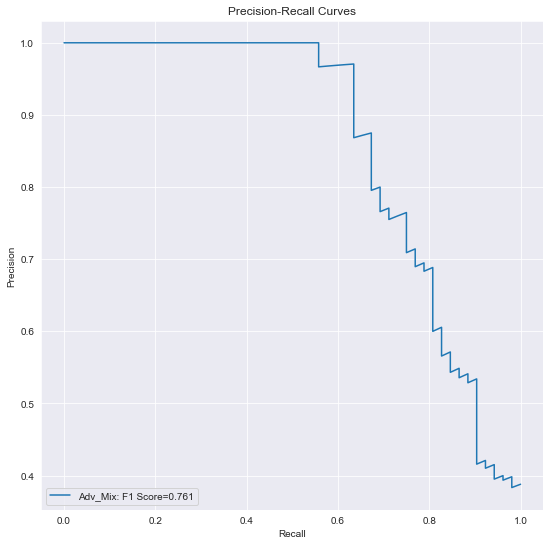

In [75]:
name='adv_mix1'
estimators = [('lightgbm', models['lightgbm']),
              ('xgb', models['xgb']),
              ('catboost', models['catboost'])]
models[name] = StackingClassifier(estimators=estimators, final_estimator=models['rbfsvm'])
models[name].fit(X_train, y_train)

score = models[name].score(X_val, y_val)
print('Adv_Mix: Score={:.3f}'.format(score))
f1 = f1_score(y_val, models[name].predict(X_val))
if hasattr(models[name], "decision_function"):
    y_prob = models[name].decision_function(X_val)
else:
    y_prob = models[name].predict_proba(X_val)[:, 1]
precision, recall, _ = precision_recall_curve(y_val, y_prob)

plt.figure(figsize=(9,9))
plt.plot(recall, precision, label = 'Adv_Mix: F1 Score={:.3f}'.format(f1))
plt.title('Precision-Recall Curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')

C:\Users\Sarda\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Sarda\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Adv_Mix: Score=0.813


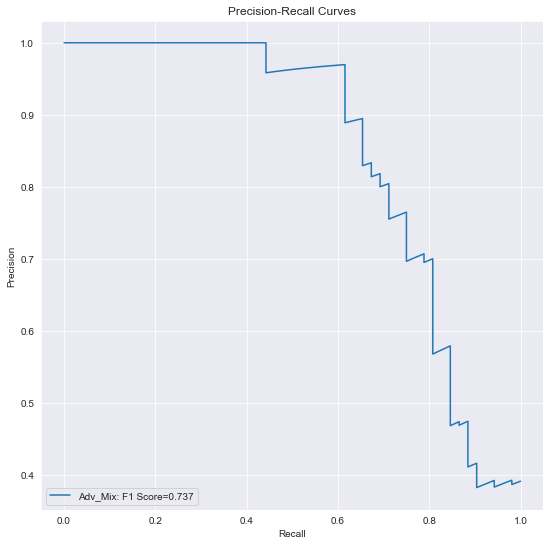

In [76]:
name='adv_mix2'
estimators = [('lightgbm', models['lightgbm']),
              ('xgb', models['xgb']),
              ('catboost', models['catboost'])]
models[name] = StackingClassifier(estimators=estimators, final_estimator=models['gpc'])
models[name].fit(X_train, y_train)

score = models[name].score(X_val, y_val)
print('Adv_Mix: Score={:.3f}'.format(score))
f1 = f1_score(y_val, models[name].predict(X_val))
if hasattr(models[name], "decision_function"):
    y_prob = models[name].decision_function(X_val)
else:
    y_prob = models[name].predict_proba(X_val)[:, 1]
precision, recall, _ = precision_recall_curve(y_val, y_prob)

plt.figure(figsize=(9,9))
plt.plot(recall, precision, label = 'Adv_Mix: F1 Score={:.3f}'.format(f1))
plt.title('Precision-Recall Curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')

#### Custom Mix

Custom_Mix1: Score=0.813


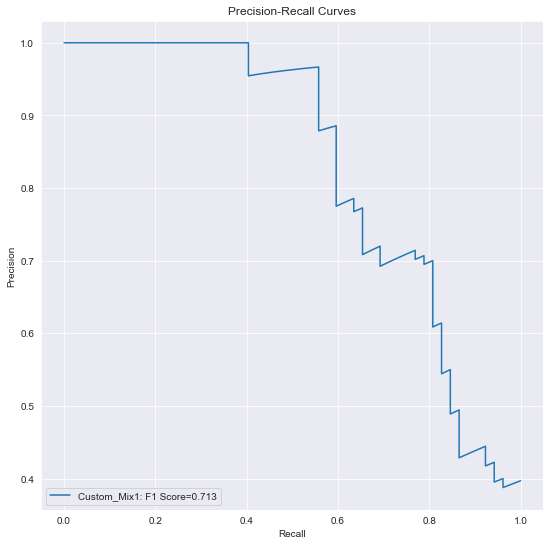

In [77]:
name='cus_mix1'
estimators = [('rfc', models['rfc']),
              ('neuralnet', models['neuralnet']),
              ('gpc', models['gpc'])]
models[name] = StackingClassifier(estimators=estimators, final_estimator=models['catboost'])
models[name].fit(X_train, y_train)

score = models[name].score(X_val, y_val)
print('Custom_Mix1: Score={:.3f}'.format(score))
f1 = f1_score(y_val, models[name].predict(X_val))
if hasattr(models[name], "decision_function"):
    y_prob = models[name].decision_function(X_val)
else:
    y_prob = models[name].predict_proba(X_val)[:, 1]
precision, recall, _ = precision_recall_curve(y_val, y_prob)

plt.figure(figsize=(9,9))
plt.plot(recall, precision, label = 'Custom_Mix1: F1 Score={:.3f}'.format(f1))
plt.title('Precision-Recall Curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')

## Submission

In [82]:
output = pd.read_csv('gender_submission.csv')
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [83]:
pred = models['lightgbm'].predict(X_test)
output['Survived'] = pred

In [84]:
output['Survived'] = output.Survived.astype('int')

In [85]:
output.to_csv('submission2.csv', index=False)